In [1]:
# Librerías para limpieza de datos
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# importamos datetime
from datetime import datetime

# Librería de ML
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

### Limieza de datos

In [2]:
# Leemos el data set
data = pd.read_excel('Catalogo1960_2021.xlsx')

# Visualizamos la información
data.info()

# verificamos los tipos de datos de cada columna
data.dtypes

# Visializamos el df con un sample()
data.sample(n=5)

# Renombramos el nombre de las columnas a lower
data.rename(columns=lambda x: x.lower(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22712 entries, 0 to 22711
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           22712 non-null  int64  
 1   FECHA_UTC    22712 non-null  int64  
 2   HORA_UTC     22712 non-null  int64  
 3   LATITUD      22712 non-null  float64
 4   LONGITUD     22712 non-null  float64
 5   PROFUNDIDAD  22712 non-null  int64  
 6   MAGNITUD     22712 non-null  float64
 7   FECHA_CORTE  22712 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.4 MB


In [4]:
data.head()

,id,fecha_utc,hora_utc,latitud,longitud,profundidad,magnitud,fecha_corte
0,0,19600113,154034,-16.145,-72.144,60,7.5,20223006
1,1,19600115,93024,-15.000,-75.000,70,7.0,20223006
2,2,19600117,25758,-14.500,-74.500,150,6.4,20223006
3,3,19600123,33732,-12.500,-68.500,300,5.8,20223006
4,4,19600130,50724,-5.500,-77.500,100,5.7,20223006


In [5]:
# Definimos una funcion para normalizar las fechas
def normalize_date_fecha_utc(data, column_date):
    fecha = [str(date) for date in data[column_date]]
    for i in range(len(fecha)):
        fecha_legible = datetime.strptime(fecha[i], "%Y%m%d").strftime("%d-%m-%Y")
        data.loc[i, column_date] = fecha_legible
    return data

def normalize_date_fecha_corte(data, column_date):
    fecha = [str(date) for date in data[column_date]]
    for i in range(len(fecha)):
        fecha_legible = datetime.strptime(fecha[i], "%Y%d%m").strftime("%d-%m-%Y")
        data.loc[i, column_date] = fecha_legible
    return data

In [6]:
# Utilizaos la funcion para normalizar las fechas
normalize_date_fecha_utc(data,column_date='fecha_utc')
normalize_date_fecha_corte(data,column_date='fecha_corte')


,id,fecha_utc,hora_utc,latitud,longitud,profundidad,magnitud,fecha_corte
0,0,13-01-1960,154034,-16.1450,-72.1440,60,7.5,30-06-2022
1,1,15-01-1960,93024,-15.0000,-75.0000,70,7.0,30-06-2022
2,2,17-01-1960,25758,-14.5000,-74.5000,150,6.4,30-06-2022
3,3,23-01-1960,33732,-12.5000,-68.5000,300,5.8,30-06-2022
4,4,30-01-1960,50724,-5.5000,-77.5000,100,5.7,30-06-2022
...,...,...,...,...,...,...,...,...
22707,22707,31-12-2021,150417,-12.6706,-76.9744,33,3.7,30-06-2022
22708,22708,31-12-2021,153529,-8.0493,-74.4580,140,4.6,30-06-2022
22709,22709,31-12-2021,165608,-14.9097,-75.3355,42,3.9,30-06-2022
22710,22710,31-12-2021,171759,-5.5762,-76.3891,127,4.5,30-06-2022


In [7]:
# Realizamos una función para agregar una columna de nivel
def nivel (data, column):
    magnitud = data[column].tolist()
    bajo = 5.4
    medio = 6.0
    alto = 6.9
    nivel = []
    for i in magnitud:
        if i <= bajo:
            nivel.append(1)
        elif i > bajo and i <= medio:
            nivel.append(2)
        elif i >= alto:
            nivel.append(3)
        else:
            nivel.append(2)

    data['nivel'] = nivel
    return data
nivel(data=data, column='magnitud')

,id,fecha_utc,hora_utc,latitud,longitud,profundidad,magnitud,fecha_corte,nivel
0,0,13-01-1960,154034,-16.1450,-72.1440,60,7.5,30-06-2022,3
1,1,15-01-1960,93024,-15.0000,-75.0000,70,7.0,30-06-2022,3
2,2,17-01-1960,25758,-14.5000,-74.5000,150,6.4,30-06-2022,2
3,3,23-01-1960,33732,-12.5000,-68.5000,300,5.8,30-06-2022,2
4,4,30-01-1960,50724,-5.5000,-77.5000,100,5.7,30-06-2022,2
...,...,...,...,...,...,...,...,...,...
22707,22707,31-12-2021,150417,-12.6706,-76.9744,33,3.7,30-06-2022,1
22708,22708,31-12-2021,153529,-8.0493,-74.4580,140,4.6,30-06-2022,1
22709,22709,31-12-2021,165608,-14.9097,-75.3355,42,3.9,30-06-2022,1
22710,22710,31-12-2021,171759,-5.5762,-76.3891,127,4.5,30-06-2022,1


# Visualizaciones

In [26]:
data.head()

,id,fecha_utc,hora_utc,latitud,longitud,profundidad,magnitud,fecha_corte,nivel
0,0,13-01-1960,154034,-16.145,-72.144,60,7.5,30-06-2022,3
1,1,15-01-1960,93024,-15.000,-75.000,70,7.0,30-06-2022,3
2,2,17-01-1960,25758,-14.500,-74.500,150,6.4,30-06-2022,2
3,3,23-01-1960,33732,-12.500,-68.500,300,5.8,30-06-2022,2
4,4,30-01-1960,50724,-5.500,-77.500,100,5.7,30-06-2022,2


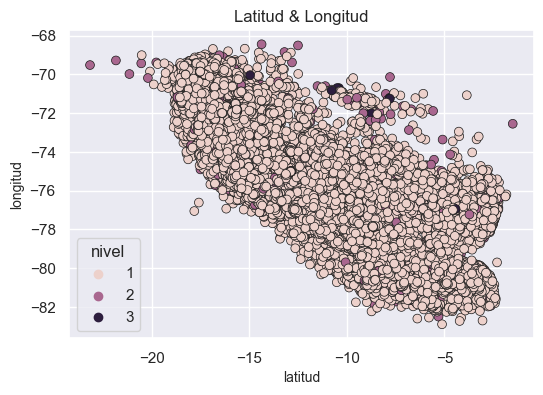

In [9]:
# Muestra una relación entre Latitud y Longitud donde se producieron los sismos
sns.set( rc = {'figure.figsize' : (6,4), 
               'axes.labelsize' : 10 })
sns.scatterplot(
    data=data, 
    x='latitud', 
    y='longitud',
    edgecolor="k",
    s=40,
    hue='nivel')
plt.title('Latitud & Longitud')
plt.show()

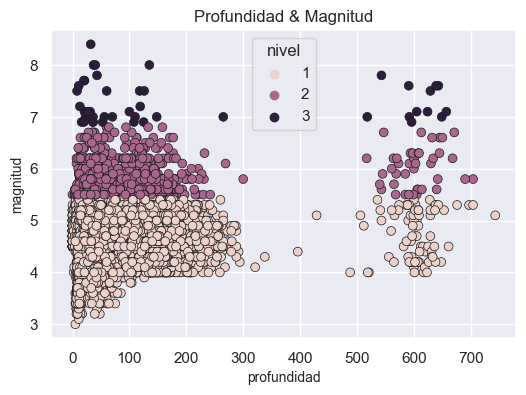

In [10]:
# Muestra una relación entre profundidad y magnitud donde se producieron los sismos
sns.set( rc = {'figure.figsize' : (6,4), 
               'axes.labelsize' : 10 })
sns.scatterplot(
    data=data, 
    x='profundidad', 
    y='magnitud',
    edgecolor="k",
    s=40,
    hue='nivel')
plt.title('Profundidad & Magnitud')
plt.show()

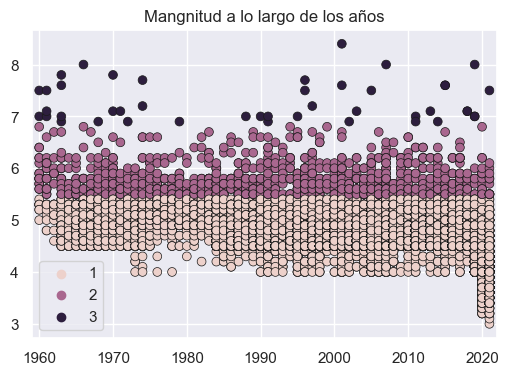

In [22]:
anio = [int(i[-4:]) for i in data.fecha_utc]
magnitud = data.magnitud.to_list()
nivel = data.nivel.to_list()
sns.set( rc = {'figure.figsize' : (6,4), 
               'axes.labelsize' : 10 })

sns.scatterplot(
    x=anio, 
    y=magnitud,
    edgecolor="k",
    s=40,
    hue=nivel)
plt.title('Mangnitud a lo largo de los años')
plt.xlim(min(anio) - 1, max(anio) + 1)
plt.show()

# Modelo de ML

In [27]:
# Traemos la data
df = data.copy()
df['fecha_utc'] = [int(i.replace('-','')) for i in df['fecha_utc']]
df = df[['fecha_utc','hora_utc','latitud','longitud','profundidad','magnitud']]

# Separamos la data en 4 partes para el modelo
X = df[['fecha_utc','hora_utc','latitud','longitud','profundidad']]
y = df.magnitud
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [28]:
# Definimos una función para obtener el mean_absolute_error
def get_mae(X_train, X_test, y_train, y_test):
    modelo = RandomForestRegressor(random_state=1)
    modelo.fit(X_train, y_train)
    predict = modelo.predict(X_test)
    return mean_absolute_error(predict, y_test)

get_mae(X_train, X_test, y_train, y_test)

0.29602888340965144

In [29]:
# Entrenamos el modelo con un forestRegressor
modelo = RandomForestRegressor()
modelo.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
# Testeamos el modelo y lo comparamos con el y_test
valores_predecidos = [round(i,1) for i in  modelo.predict(X_test)]
valores_reales = [i for i in y_test]
print(f'valores_predecidos:{valores_predecidos[:20]}')
print(f'valores_reales    :{valores_reales[:20]}')

valores_predecidos:[4.6, 4.6, 4.8, 4.8, 4.7, 4.8, 4.9, 4.7, 4.8, 4.7, 5.0, 4.7, 4.8, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.2]
valores_reales    :[5.0, 4.7, 5.3, 4.0, 4.8, 4.5, 4.6, 4.5, 4.5, 4.6, 5.2, 4.0, 4.5, 4.5, 5.2, 4.6, 4.5, 4.7, 4.3, 5.1]


In [84]:
# Poniendolo a prueba
x = pd.DataFrame([[5062023, 221141, -18.4571, -69.5785, 66]], columns=[i for i in X_train.columns])
print(f'Si el 05-06-23, hubiese un sismo en las coordenadas mencionadas, este sería de un: {modelo.predict(x)}')

Si el 05-06-23, hubiese un sismo en las coordenadas mencionadas, este sería de un: [4.629]
